# Monte Carlo Simulation for Portfolio Risk

In this notebook, we simulate thousands of possible future portfolio returns, using the historical statistics of our asset returns, to estimate risk and quantify downside scenarios (VaR, CVaR, volatility).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

returns = pd.read_csv('C:\\projects\\portfolio-risk-assessment\\Data\\processed\\portfolio_returns.csv', index_col=0, parse_dates=True)
assets = returns.columns.tolist()
print(returns.head())


                AAPL      MSFT       TLT       VNQ       SPY
Date                                                        
2019-01-03 -0.099607 -0.036788  0.011380  0.006991 -0.023863
2019-01-04  0.042689  0.046509 -0.011575  0.011707  0.033496
2019-01-07 -0.002226  0.001276 -0.002948  0.009823  0.007885
2019-01-08  0.019063  0.007250 -0.002628  0.020652  0.009396
2019-01-09  0.016982  0.014300 -0.001565 -0.001436  0.004673


# Portfolio Daily Return Matrix
Each column in `returns` represents daily % change for each asset.


In [ ]:
# Equal weights for demonstration 
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

n_simulations = 10000
n_days = 21  # For 1-month horizon
initial_investment = 1


# Weights and Simulation Setup
Portfolio weights determine how much is allocated to each asset. Simulations randomly generate how prices could evolve over 21 trading days.


In [3]:
mean_return = returns.mean().values
cov_matrix = returns.cov().values

final_portfolio_values = []

for _ in range(n_simulations):
    daily_returns = np.random.multivariate_normal(mean_return, cov_matrix, n_days)
    portfolio_returns = np.dot(daily_returns, weights)
    portfolio_growth = np.cumprod(1 + portfolio_returns)[-1]
    final_portfolio_values.append(initial_investment * portfolio_growth)

final_portfolio_values = np.array(final_portfolio_values)
total_returns = final_portfolio_values - initial_investment


# Monte Carlo Simulation Logic
Each simulation generates a plausible sequence of daily portfolio returns, using the asset correlations.


In [4]:
VaR_95 = np.percentile(total_returns, 5)
CVaR_95 = total_returns[total_returns <= VaR_95].mean()
std_dev = total_returns.std()
mean_ret = total_returns.mean()

print(f"Expected Return (Mean): {mean_ret:.4f}")
print(f"Portfolio Std Dev: {std_dev:.4f}")
print(f"Value at Risk (95%): {VaR_95:.4f}")
print(f"Conditional VaR (CVaR, 95%): {CVaR_95:.4f}")


Expected Return (Mean): 0.0152
Portfolio Std Dev: 0.0534
Value at Risk (95%): -0.0689
Conditional VaR (CVaR, 95%): -0.0890


# Risk Metric Definitions
- **VaR (Value at Risk, 95%)**: Maximum expected loss with 95% confidence (i.e., only 5% of outcomes worse).
- **CVaR (Conditional VaR)**: Average loss in the worst 5%.
- **Volatility**: Standard deviation of simulated returns.


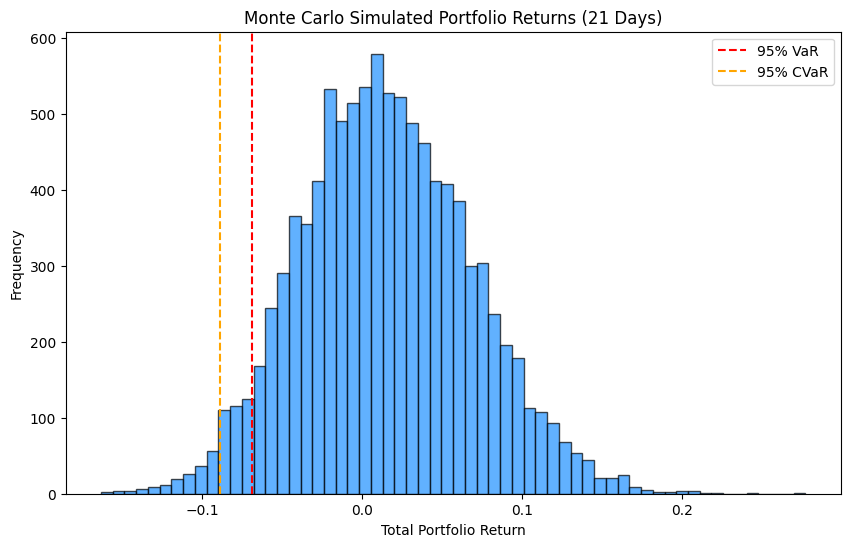

In [6]:
plt.figure(figsize=(10,6))
plt.hist(total_returns, bins=60, alpha=0.7, color='dodgerblue', edgecolor='black')
plt.axvline(VaR_95, color='red', linestyle='--', label='95% VaR')
plt.axvline(CVaR_95, color='orange', linestyle='--', label='95% CVaR')
plt.title("Monte Carlo Simulated Portfolio Returns (21 Days)")
plt.xlabel("Total Portfolio Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()


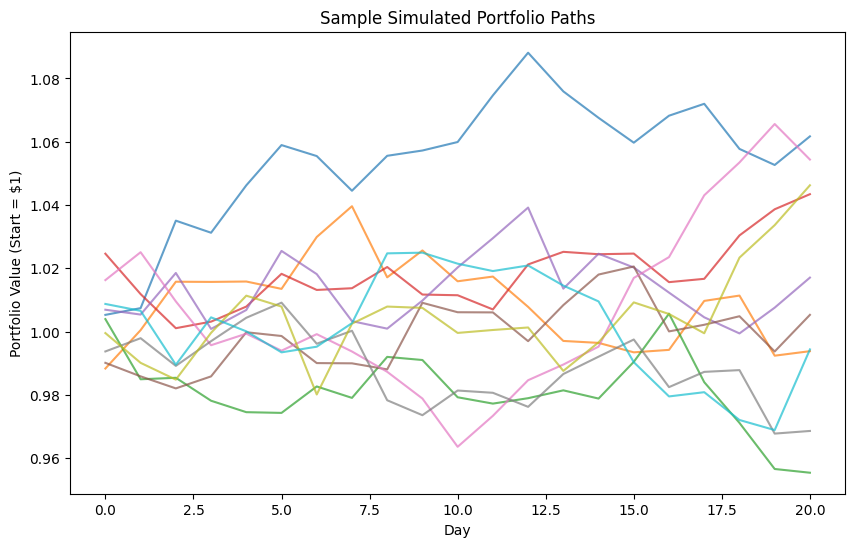

In [7]:
plt.figure(figsize=(10,6))
for i in range(10):
    daily = np.random.multivariate_normal(mean_return, cov_matrix, n_days)
    path = np.cumprod(1 + np.dot(daily, weights))
    plt.plot(path, alpha=0.7)
plt.title("Sample Simulated Portfolio Paths")
plt.xlabel("Day")
plt.ylabel("Portfolio Value (Start = $1)")
plt.show()


# Interpretation & Next Steps

The simulation reveals sizeable downside risk—particularly during stress scenarios reflected in the historical data. These risk metrics guide asset allocation and highlight the need for diversification.
